# Proyek Analisis Data: Air Quality Aotizhongxin
- **Nama:** Zaki Marsyandi
- **Email:** zakimarsyandi@gmail.com
- **ID Dicoding:** zakimars15

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
1. Bagaimana perubahan distribusi kategori PM2.5 dan PM10 dari tahun 2013 hingga 2017, dan apakah ada indikasi peningkatan kualitas udara selama periode tersebut?


- Pertanyaan 2
1. Bagaimana perubahan suhu dan tekanan atmosfer mempengaruhi konsentrasi PM2.5 dan PM10, serta apa implikasi dari hubungan ini terhadap kualitas udara?



## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling




### Gathering Data

In [4]:
df = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [5]:
print('Describe: \n\n', df.describe())
print('\nHead: \n', df.head())
print('\nTail: \n', df.tail())
print('\nInfo: ')
df.info()

Describe: 

                  No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     

**Insight:**
- Membaca dataset Air Quality Aotizhongxin
- Menyimpan data
- Mendapatkan ringkasan statistik dari data numerik

### Assessing Data

In [6]:
nunique = df.nunique()
columns = df.columns
count = df.count()
dtypes = df.dtypes


print(nunique, '\n')
print(columns, '\n')
print(count, '\n')
print(dtypes, '\n')

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         633
SO2          330
NO2          465
CO           112
O3           831
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64 

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object') 

No         35064
year       35064
month      35064
day        35064
hour       35064
PM2.5      34139
PM10       34346
SO2        34129
NO2        34041
CO         33288
O3         33345
TEMP       35044
PRES       35044
DEWP       35044
RAIN       35044
wd         34983
WSPM       35050
station    35064
dtype: int64 

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO        

In [7]:
Q1 = (df['PM2.5']).quantile(0.25)
Q3 = (df['PM2.5']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['PM2.5'] < minimum
kondisi_more_than = df['PM2.5'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

In [8]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [22]:
total_data = df.size
data_na = df.isna().sum().sum()

print('Total data:', total_data)
print('Total NA/null data:', data_na)

data_available = total_data - data_na
print('Total data yang tersedia:', data_available)

Total data: 635360
Total NA/null data: 0
Total data yang tersedia: 635360


**Insight:**
- Mengetahui berapa banyak data yang duplicate
- Mengetahui berapa banyak data Null pada setiap kategori
- Mengetahui total data null dari data

### Cleaning Data

In [11]:
df.fillna({
    'PM2.5': df['PM2.5'].mean(),
    'PM10': df['PM10'].mean(),
    'SO2': df['SO2'].mean(),
    'NO2': df['NO2'].mean(),
    'CO': df['CO'].mean(),
    'O3': df['O3'].mean(),
    'TEMP': df['TEMP'].mean(),
    'PRES': df['PRES'].mean(),
    'DEWP': df['DEWP'].mean(),
    'RAIN': df['RAIN'].mean(),
    'WSPM': df['WSPM'].mean(),
    'wd': df['wd'].mode()[0]
}, inplace=True)


**Insight:**
- Data sudah bersih dari Null menggunakan fillna
- Mengisi data null menggunakan mean

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
monthly_stats = df.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean'
})
print(monthly_stats)

          PM2.5        PM10        SO2        NO2           CO         O3  \
year                                                                        
2013  73.606236  104.538281  21.924315  61.204773  1089.087563  50.991399   
2014  76.492217  107.374650  19.123951  60.190156  1064.501849  51.658385   
2015  68.225037   98.899439  13.560972  56.867188  1221.903787  65.791999   
2016  64.432760   85.226043  10.220165  45.918177  1066.178149  63.580698   
2017  64.545968   76.676551  18.427262  57.800869  1249.900269  49.557317   

           TEMP         PRES       DEWP      RAIN      WSPM  
year                                                         
2013  15.666860  1008.115940   6.483848  0.071857  1.549618  
2014  14.197303  1011.135473   4.186273  0.059579  1.501854  
2015  13.948341  1012.344635   2.825237  0.076510  1.934308  
2016  14.214972  1012.731039   2.409683  0.082646  1.888096  
2017   0.951934  1024.034067 -13.822885  0.004062  2.056536  


In [13]:
df.groupby('year').mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3663.093715,7.487118,15.804219,11.487826,73.606236,104.538281,21.924315,61.204773,1089.087563,50.991399,15.666860,1008.115940,6.483848,0.071857,1.549618
2014,11729.281999,6.538350,15.566285,11.502228,76.492217,107.374650,19.123951,60.190156,1064.501849,51.658385,14.197303,1011.135473,4.186273,0.059579,1.501854
2015,20378.191203,6.382286,15.678644,11.490927,68.225037,98.899439,13.560972,56.867188,1221.903787,65.791999,13.948341,1012.344635,2.825237,0.076510,1.934308
2016,29220.497346,6.462664,15.809131,11.486021,64.432760,85.226043,10.220165,45.918177,1066.178149,63.580698,14.214972,1012.731039,2.409683,0.082646,1.888096
2017,34388.368421,1.496465,15.931658,11.638649,64.545968,76.676551,18.427262,57.800869,1249.900269,49.557317,0.951934,1024.034067,-13.822885,0.004062,2.056536


In [14]:
df.groupby('month').mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20586.969468,2015.467672,16.335848,11.572917,73.117435,93.609207,32.920815,60.650756,1673.479270,28.428127,-1.558869,1023.461361,-14.767362,0.000661,1.928846
2,22045.027414,2015.554231,14.474772,11.541120,65.364367,84.244424,26.712054,48.670761,1245.795875,46.124797,1.286967,1021.681219,-13.260311,0.011550,2.034064
3,13450.982803,2014.491767,16.201610,11.528357,80.516468,132.474521,29.006729,59.200048,1204.035577,48.658506,8.313413,1015.563709,-7.961983,0.009879,2.091255
4,14276.464548,2014.502969,15.497380,11.492490,74.717810,129.123261,16.276753,52.760337,856.585097,65.136711,15.287321,1009.362033,1.125533,0.023681,2.176493
5,15074.879878,2014.510350,16.068884,11.522226,64.941126,113.408670,15.909314,48.817564,789.305135,88.619343,21.415541,1003.383237,7.657448,0.047879,2.049644
6,15818.872714,2014.512307,15.354079,11.492968,68.579553,83.939943,8.264647,49.271289,921.062813,94.550821,24.554255,1000.345710,16.064241,0.153340,1.547257
7,16469.756666,2014.502531,16.043537,11.511981,74.369933,84.572347,5.935642,48.070394,834.621418,95.806804,27.198481,999.090753,20.374992,0.268410,1.473439
8,17199.420646,2014.501009,16.003362,11.499328,55.837365,72.195281,4.564373,48.773637,807.932464,84.932660,26.712038,1002.199025,19.351042,0.116241,1.420511
9,18016.820916,2014.511018,15.407135,11.489332,62.964618,85.729392,7.184380,58.923941,913.555964,52.284276,20.928283,1009.691661,14.374599,0.118360,1.353443


In [15]:
df.groupby('hour').mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17427.756401,2014.657644,6.456474,15.678859,74.667682,107.306010,16.178433,66.922184,1204.414107,41.257526,11.918460,1011.960005,4.058154,0.080739,1.357571
1,17405.676149,2014.650620,6.509117,15.680525,74.856335,106.179844,16.130454,66.137169,1229.858559,37.062053,11.436247,1011.904486,4.234573,0.048286,1.304376
2,17453.852174,2014.657246,6.493478,15.699275,75.816619,104.739383,15.646223,63.295299,1237.967677,33.621946,10.880607,1011.902874,4.069130,0.059203,1.266014
3,17428.780911,2014.654375,6.491685,15.715112,74.084683,100.098746,14.919096,61.688305,1171.382145,32.053232,10.460882,1011.844211,3.955168,0.129552,1.230975
4,17443.103448,2014.655172,6.500718,15.701868,72.678411,96.697246,14.343119,61.355334,1162.808351,34.584005,10.082102,1011.872302,3.769969,0.077565,1.194137
5,17437.662133,2014.654259,6.501790,15.733715,70.066085,91.879658,13.802571,59.237591,1142.594412,27.279803,9.801857,1012.044162,3.672940,0.055097,1.216778
6,17454.742857,2014.654286,6.524286,15.709286,68.610291,89.583083,13.712721,58.976043,1149.288853,25.924459,9.947582,1012.301174,3.676426,0.045836,1.296599
7,17442.850248,2014.652945,6.521647,15.740241,68.459377,89.834173,14.224136,59.428516,1191.779801,25.106449,10.841522,1012.728321,3.549038,0.031043,1.418720
8,17490.848335,2014.657690,6.529412,15.726435,69.255385,92.890916,15.830696,59.834782,1221.860787,27.056838,12.206771,1013.021678,3.311264,0.043827,1.610135


In [16]:
df.groupby('day').mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,16701.301818,2014.608182,6.521818,11.487273,72.663371,96.748787,14.774656,54.276406,1062.815179,55.533678,14.038364,1010.849182,3.461364,0.115091,1.740636
2,17134.804444,2014.651556,6.561778,11.500444,68.506900,87.612889,17.683141,55.434750,1153.337258,54.181382,13.821473,1010.299822,2.922667,0.054400,1.669600
3,16612.135009,2014.584730,6.615456,11.380819,69.396262,99.491465,17.810265,54.881949,1170.015547,60.210892,14.579609,1010.607356,2.661359,0.000745,1.851955
4,16170.813576,2014.526769,6.674952,11.595602,68.657687,93.715950,14.075061,53.807770,1147.973501,63.026804,14.545666,1010.762620,3.571606,0.096558,1.785373
5,17409.704668,2014.684022,6.449731,11.419210,71.938518,97.237941,15.730398,52.911081,1170.698327,62.358318,13.819300,1012.015470,2.706643,0.036715,1.841921
6,17574.074176,2014.699634,6.453297,11.579670,77.919826,101.468712,18.423080,54.941867,1326.822067,58.082019,13.183013,1012.522390,2.355311,0.075092,1.630037
7,17576.859361,2014.700457,6.414612,11.519635,76.416687,99.071354,17.016912,55.195963,1268.569651,56.475392,13.690807,1012.338417,3.302374,0.141005,1.685388
8,17566.868566,2014.697610,6.402574,11.633272,69.445951,92.334023,16.245044,51.931364,1055.988025,60.469667,13.678178,1012.344393,2.318107,0.047059,1.918474
9,17377.664563,2014.678088,6.345356,11.420198,64.276857,90.344785,15.166528,53.471127,1040.979984,57.499626,12.900000,1012.651999,1.990352,0.043192,1.824076


In [24]:
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['PM2.5_category'] = pd.cut(df['PM2.5'], bins=bins, labels=labels)
df['PM10_category'] = pd.cut(df['PM10'], bins=bins, labels=labels)
print(df[['PM2.5', 'PM2.5_category']])
print(df[['PM10', 'PM10_category']])


       PM2.5 PM2.5_category
0        4.0           Good
1        8.0           Good
2        7.0           Good
3        6.0           Good
4        3.0           Good
...      ...            ...
35059   12.0           Good
35060   13.0           Good
35061   16.0           Good
35062   21.0           Good
35063   19.0           Good

[33440 rows x 2 columns]
       PM10 PM10_category
0       4.0          Good
1       8.0          Good
2       7.0          Good
3       6.0          Good
4       3.0          Good
...     ...           ...
35059  29.0          Good
35060  37.0          Good
35061  37.0          Good
35062  44.0          Good
35063  31.0          Good

[33440 rows x 2 columns]


In [18]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
print(correlation_matrix)

             No      year     month       day      hour     PM2.5      PM10  \
No     1.000000  0.970484  0.035483  0.024550  0.000867 -0.073499 -0.129593   
year   0.970484  1.000000 -0.205710  0.003994  0.001325 -0.070837 -0.111475   
month  0.035483 -0.205710  1.000000 -0.001503 -0.004813 -0.005224 -0.066604   
day    0.024550  0.003994 -0.001503  1.000000  0.000725  0.004454  0.031612   
hour   0.000867  0.001325 -0.004813  0.000725  1.000000 -0.016158  0.027577   
PM2.5 -0.073499 -0.070837 -0.005224  0.004454 -0.016158  1.000000  0.803659   
PM10  -0.129593 -0.111475 -0.066604  0.031612  0.027577  0.803659  1.000000   
SO2   -0.255608 -0.190085 -0.249903 -0.024979  0.005482  0.473771  0.439820   
NO2   -0.126602 -0.147881  0.097742  0.014489 -0.062842  0.616706  0.561946   
CO     0.025484  0.020215  0.021477 -0.031198 -0.053765  0.712205  0.561739   
O3     0.059572  0.079489 -0.087518  0.007843  0.301496 -0.103777 -0.080643   
TEMP  -0.095265 -0.127763  0.144113  0.018904  0.143

**Insight:**
- Mengetahui rata-rata dari data
- Menerapkan teknik analisis lanjutan seperti binning dan analisis korelasi

## Visualization & Explanatory Analysis


## Pertanyaan 1
Bagaimana perubahan distribusi kategori PM2.5 dan PM10 dari tahun 2013 hingga 2017, dan apakah ada indikasi peningkatan kualitas udara selama periode tersebut?


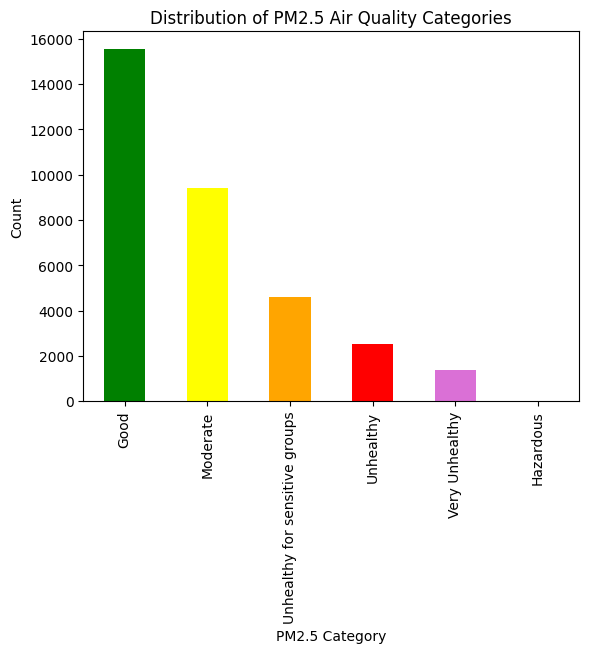

In [19]:
pm25_category_counts = df['PM2.5_category'].value_counts()
pm25_category_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'orchid', 'rosybrown'])
plt.xlabel('PM2.5 Category')
plt.ylabel('Count')
plt.title('Distribution of PM2.5 Air Quality Categories')
plt.show()

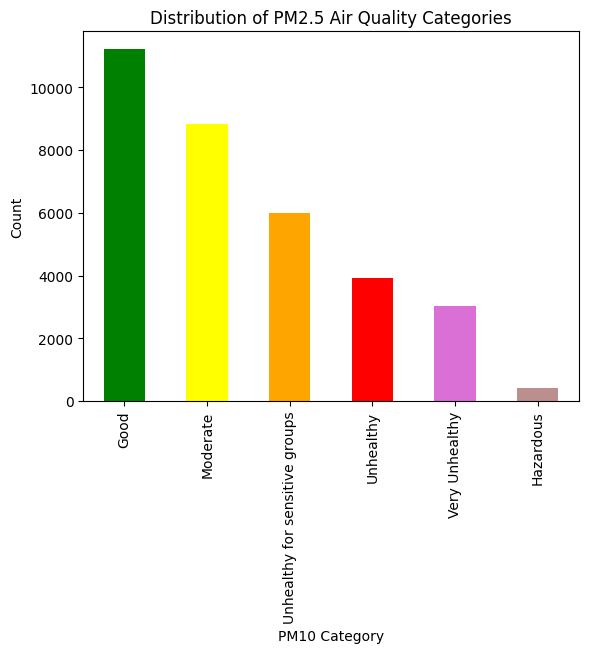

In [25]:
pm25_category_counts = df['PM10_category'].value_counts()
pm25_category_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'orchid', 'rosybrown'])
plt.xlabel('PM10 Category')
plt.ylabel('Count')
plt.title('Distribution of PM2.5 Air Quality Categories')
plt.show()

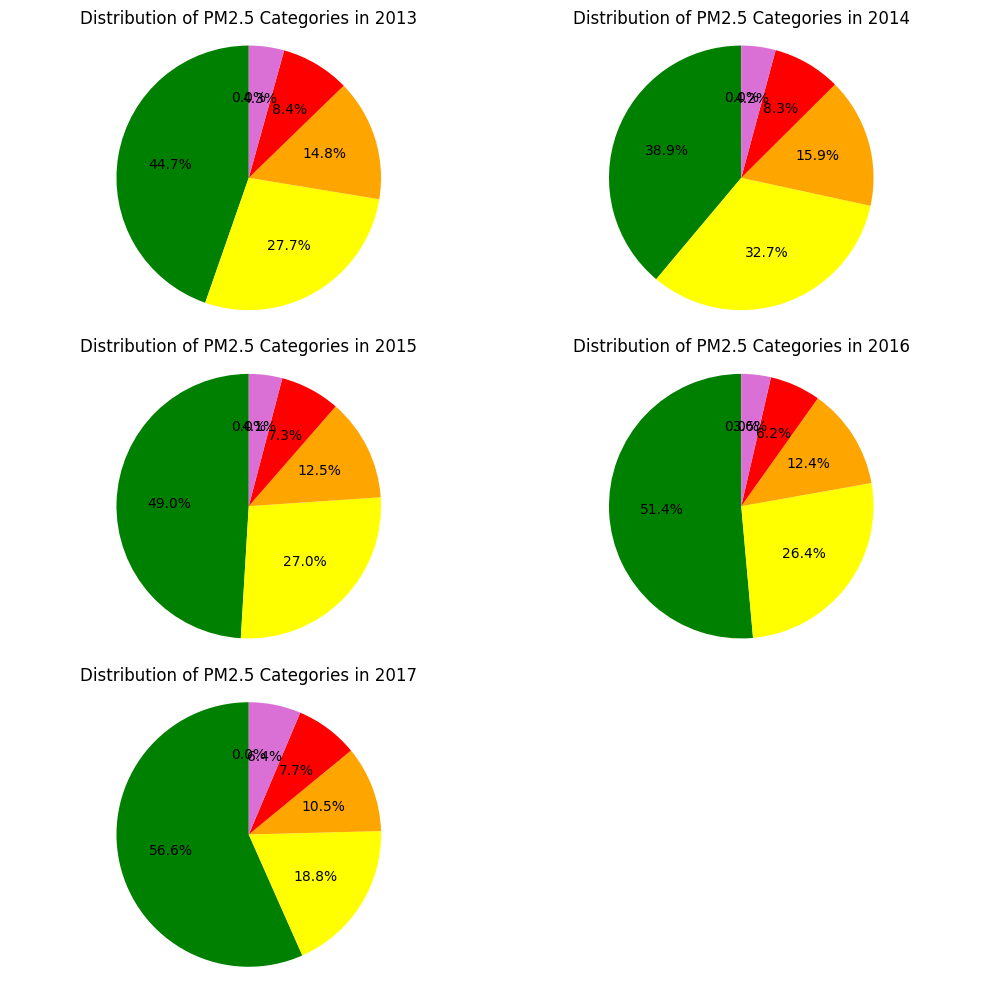

In [20]:
years = [2013, 2014, 2015, 2016, 2017]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(years)):
    year_data = df[df['year'] == years[i]]['PM2.5_category'].value_counts()
    axes[i].pie(year_data, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'orange', 'red', 'orchid', 'rosybrown'])
    axes[i].set_title(f'Distribution of PM2.5 Categories in {years[i]}')
    axes[i].axis('equal')

axes[5].axis('off')

plt.tight_layout()
plt.show()

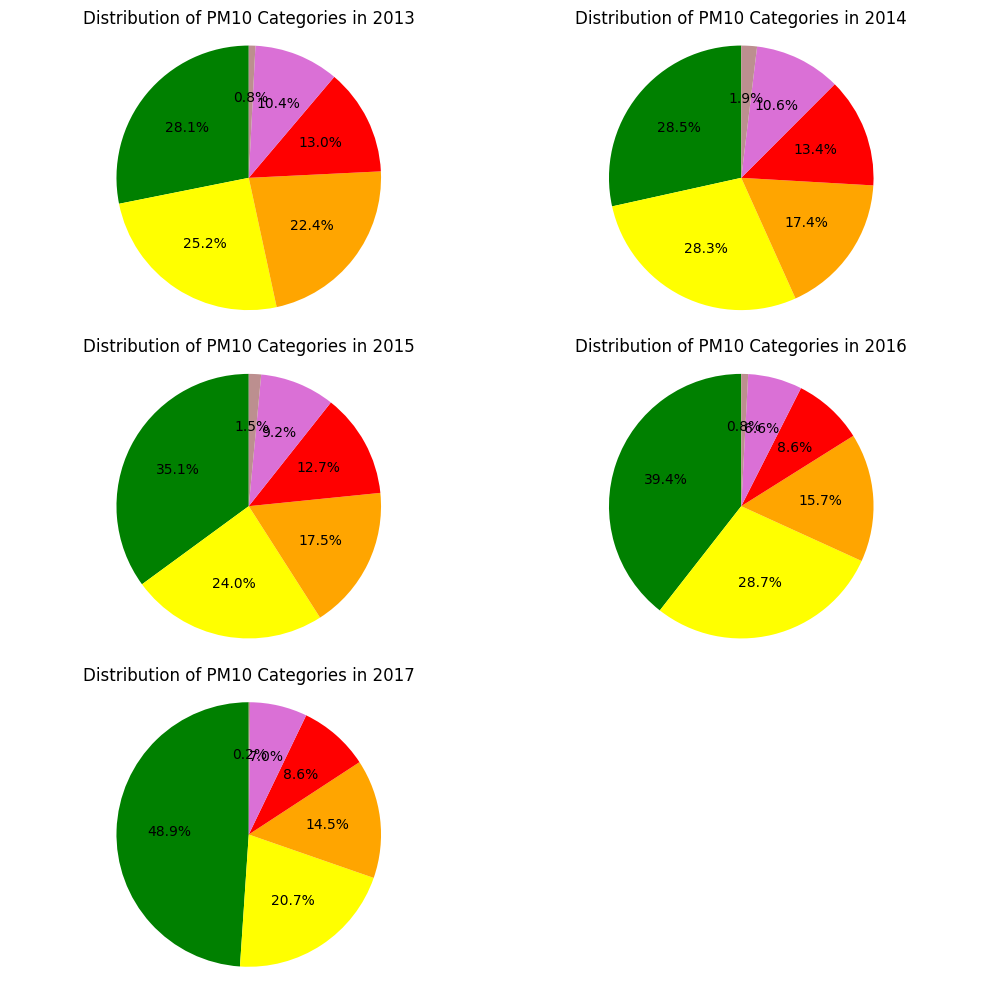

In [26]:
years = [2013, 2014, 2015, 2016, 2017]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(years)):
    year_data = df[df['year'] == years[i]]['PM10_category'].value_counts()
    axes[i].pie(year_data, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'orange', 'red', 'orchid', 'rosybrown'])
    axes[i].set_title(f'Distribution of PM10 Categories in {years[i]}')
    axes[i].axis('equal')

axes[5].axis('off')

plt.tight_layout()
plt.show()

Dari analisis persentase distribusi PM2.5 dan PM10 antara tahun 2013 dan 2017, terdapat peningkatan yang signifikan dalam kategori "Good" untuk keduanya. Hal ini mengindikasikan adanya perbaikan kualitas udara di wilayah Aotizhongxin selama periode tersebut, dengan penurunan konsentrasi polusi partikulat.

### Pertanyaan 2:
Bagaimana perubahan suhu dan tekanan atmosfer mempengaruhi konsentrasi PM2.5 dan PM10, serta apa implikasi dari hubungan ini terhadap kualitas udara?



In [44]:
groupByYear = df.groupby('year').mean(numeric_only=True)

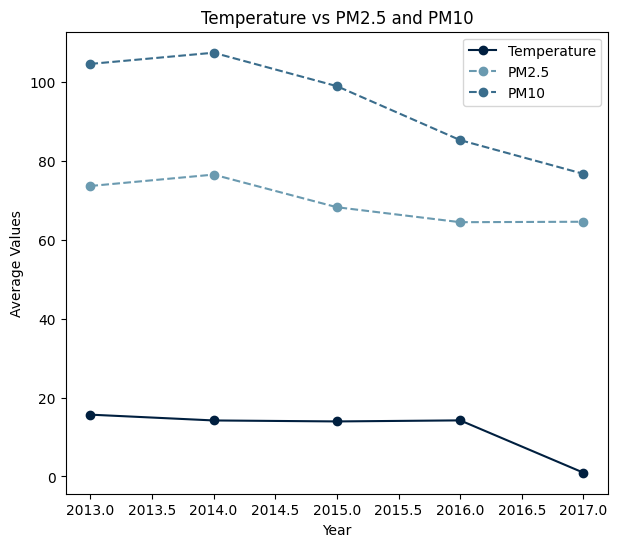

In [56]:
plt.figure(figsize=(7, 6))
plt.plot(groupByYear.index, groupByYear['TEMP'], label='Temperature', color='#001F3F', linestyle='-', marker='o')
plt.plot(groupByYear.index, groupByYear['PM2.5'], label='PM2.5', color='#6A9AB0', linestyle='--', marker='o')
plt.plot(groupByYear.index, groupByYear['PM10'], label='PM10', color='#3A6D8C', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Temperature vs PM2.5 and PM10')
plt.legend()
plt.show()


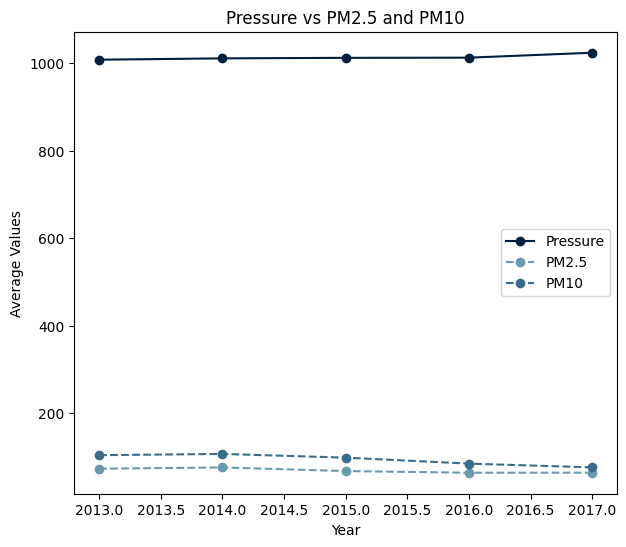

In [55]:
plt.figure(figsize=(7, 6))
plt.plot(groupByYear.index, groupByYear['PRES'], label='Pressure', color='#001F3F', linestyle='-', marker='o')
plt.plot(groupByYear.index, groupByYear['PM2.5'], label='PM2.5', color='#6A9AB0', linestyle='--', marker='o')
plt.plot(groupByYear.index, groupByYear['PM10'], label='PM10', color='#3A6D8C', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Pressure vs PM2.5 and PM10')
plt.legend()
plt.show()


Penurunan suhu, terutama yang tajam pada tahun 2017, memiliki pengaruh signifikan terhadap penurunan konsentrasi PM2.5 dan PM10. Tekanan atmosfer yang stabil memberikan latar belakang yang konsisten untuk perubahan ini. Interaksi kompleks antara suhu dan tekanan atmosfer berkontribusi pada peningkatan kualitas udara yang teramati. Namun, untuk pemahaman yang lebih komprehensif, diperlukan analisis faktor-faktor tambahan dan data jangka panjang.

**Insight:**
- Peningkatan signifikan dalam kategori "Good" untuk PM2.5 dan PM10 antara tahun 2013 dan 2017 di wilayah Aotizhongxin menunjukkan tren perbaikan kualitas udara yang konsisten.
- Penurunan suhu yang tajam pada tahun 2017, dikombinasikan dengan tekanan atmosfer yang stabil, menjadi faktor kunci dalam menurunkan konsentrasi PM2.5 dan PM10, menunjukkan bahwa kondisi meteorologi memiliki peran penting dalam dinamika kualitas udara.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2